# FINAL CAPSTONE PROJECT

### Importing packages and files containing ratings and movies

In [15]:
import numpy as np
import pandas as pd
df=pd.read_csv("ratings.csv")
mov=pd.read_csv("movies.csv")
df=pd.merge(mov,df,on="movieId")
ratings=pd.DataFrame(df.groupby("title")["rating"].mean())
ratings["no of ratings"]=pd.DataFrame(df.groupby("title")["rating"].count())
mov=df.pivot_table(index="userId",columns="title",values="rating")

### importing packages for ploting graphs

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
%matplotlib inline

### Sorting values in decending order

In [17]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Name: rating, dtype: float64

### sorting count in decending order

In [18]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64

In [19]:
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [20]:
ratings['no of ratings']=pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,no of ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


### Histogram betwen number of ratings and number of movies

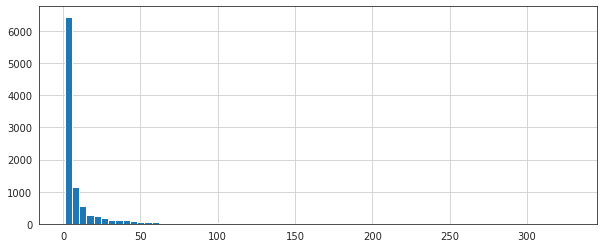

In [21]:
plt.figure(figsize=(10,4))
ratings['no of ratings'].hist(bins=70)

#### Histogram between rating and number of movies

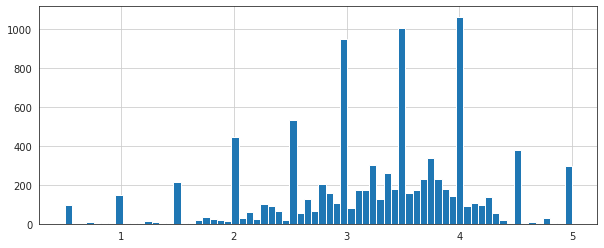

In [22]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

### jointplot between number of ratings and ratings

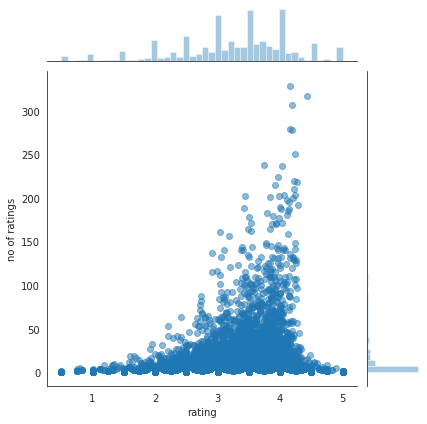

In [23]:
sns.jointplot(x='rating',y='no of ratings',data=ratings,alpha=0.5)

# For movie Forrest gump

In [24]:

forest=mov["Forrest Gump (1994)"]
sforest=mov.corrwith(forest)
corr_forest=pd.DataFrame(sforest,columns=["correlation"])
corr_forest.dropna(inplace=True)
corr_forest=corr_forest.join(ratings["no of ratings"])
corr_forest[corr_forest["no of ratings"]>100].sort_values("correlation",ascending=False).head()

/home/dilip/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/dilip/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlation,no of ratings
title,,
Forrest Gump (1994),1.000000,329
Good Will Hunting (1997),0.484042,141
Aladdin (1992),0.464268,183
American History X (1998),0.457287,129
"Truman Show, The (1998)",0.432556,125


# For movie Pulp Fiction

In [25]:
pulp=mov["Pulp Fiction (1994)"]
spulp=mov.corrwith(pulp)
corr_forest=pd.DataFrame(spulp,columns=["correlation"])
corr_forest.dropna(inplace=True)
corr_forest=corr_forest.join(ratings["no of ratings"])
corr_forest[corr_forest["no of ratings"]>100].sort_values("correlation",ascending=False).head()

/home/dilip/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/dilip/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlation,no of ratings
title,,
Pulp Fiction (1994),1.000000,307
Fight Club (1999),0.543465,218
Kill Bill: Vol. 1 (2003),0.504147,131
Trainspotting (1996),0.437714,102
Kill Bill: Vol. 2 (2004),0.421685,110
